## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

## Assigning Path for Dataset

In [2]:
import os

In [3]:
train_path = 'Train'
test_path = 'Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

## Finding Total Classes

In [4]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [5]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Visualizing The Dataset

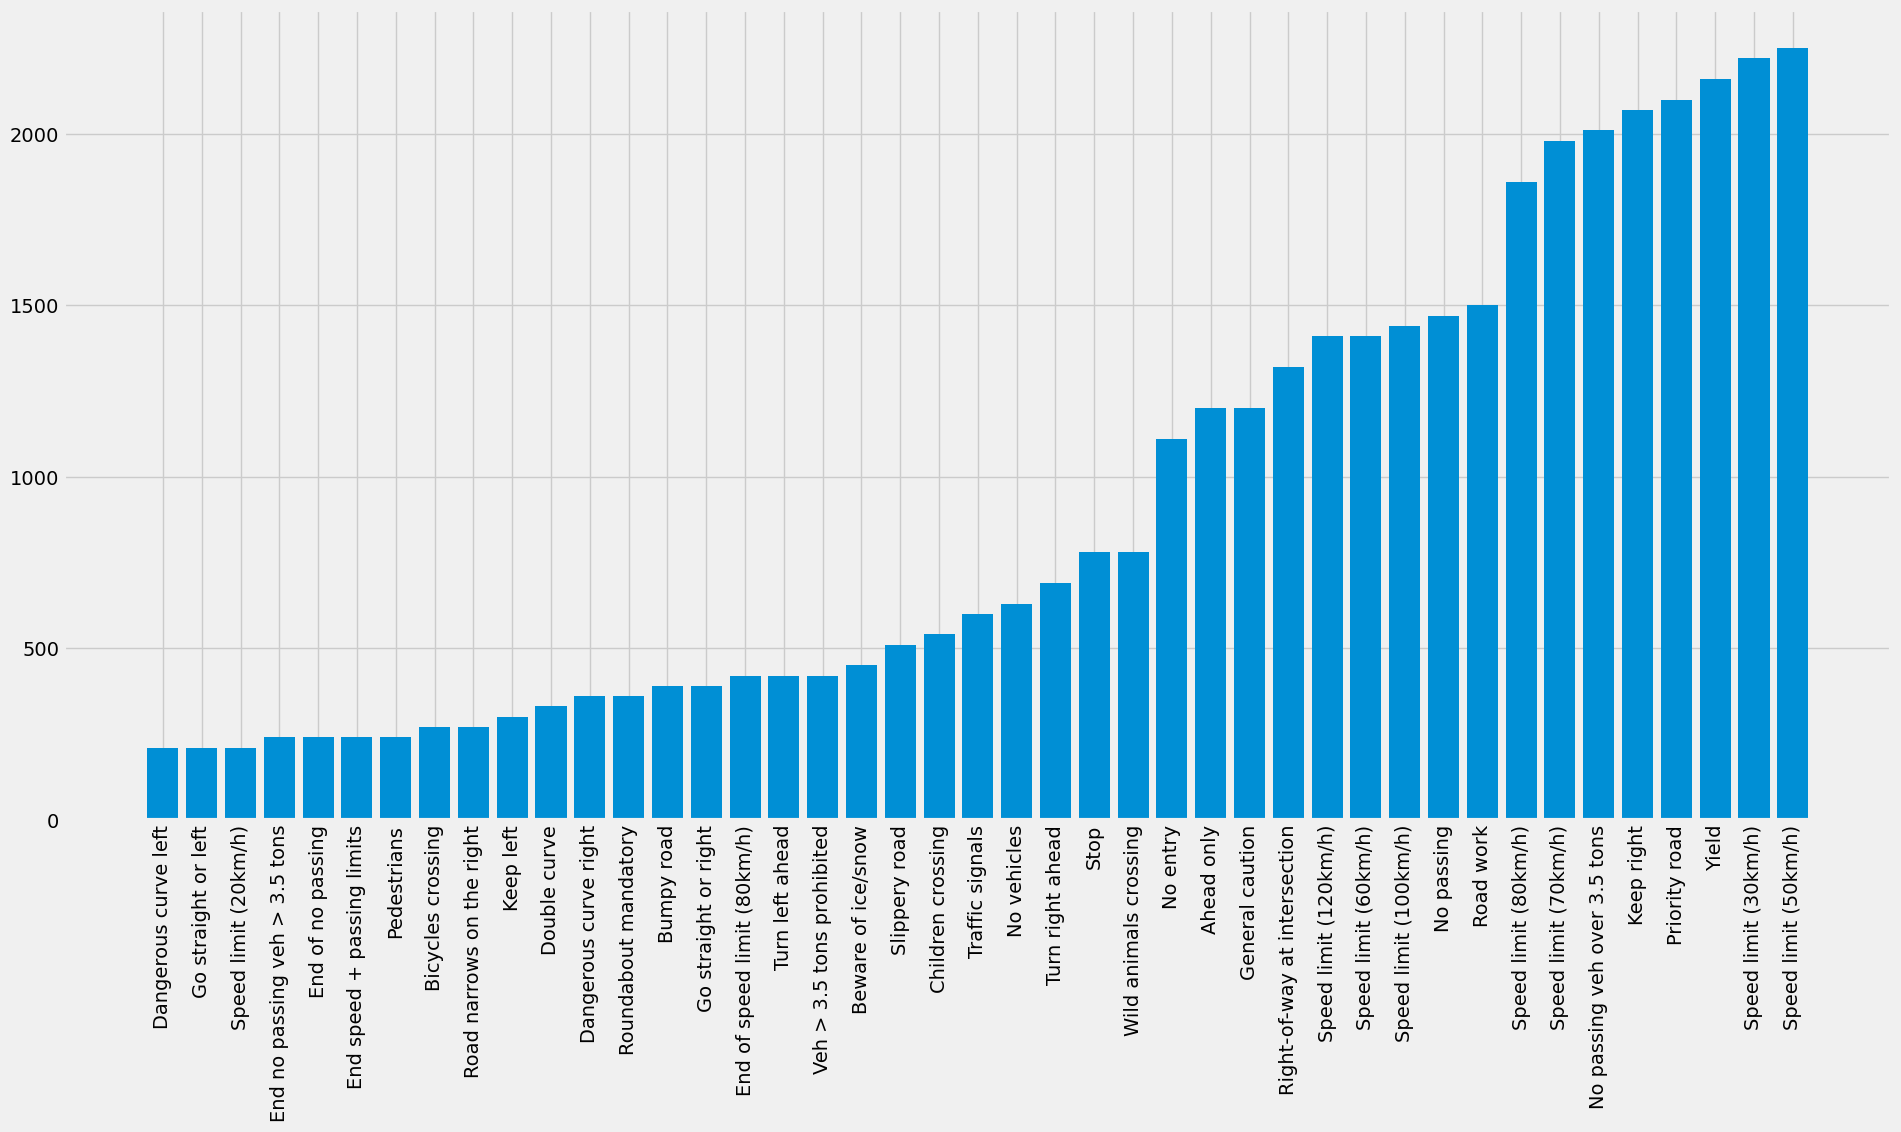

In [6]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [7]:
data_dir = "C:/Users/baye2/Deep_Learning/Traffic_Signs_Recognition"

#### Visualizing 25 random images from test data 

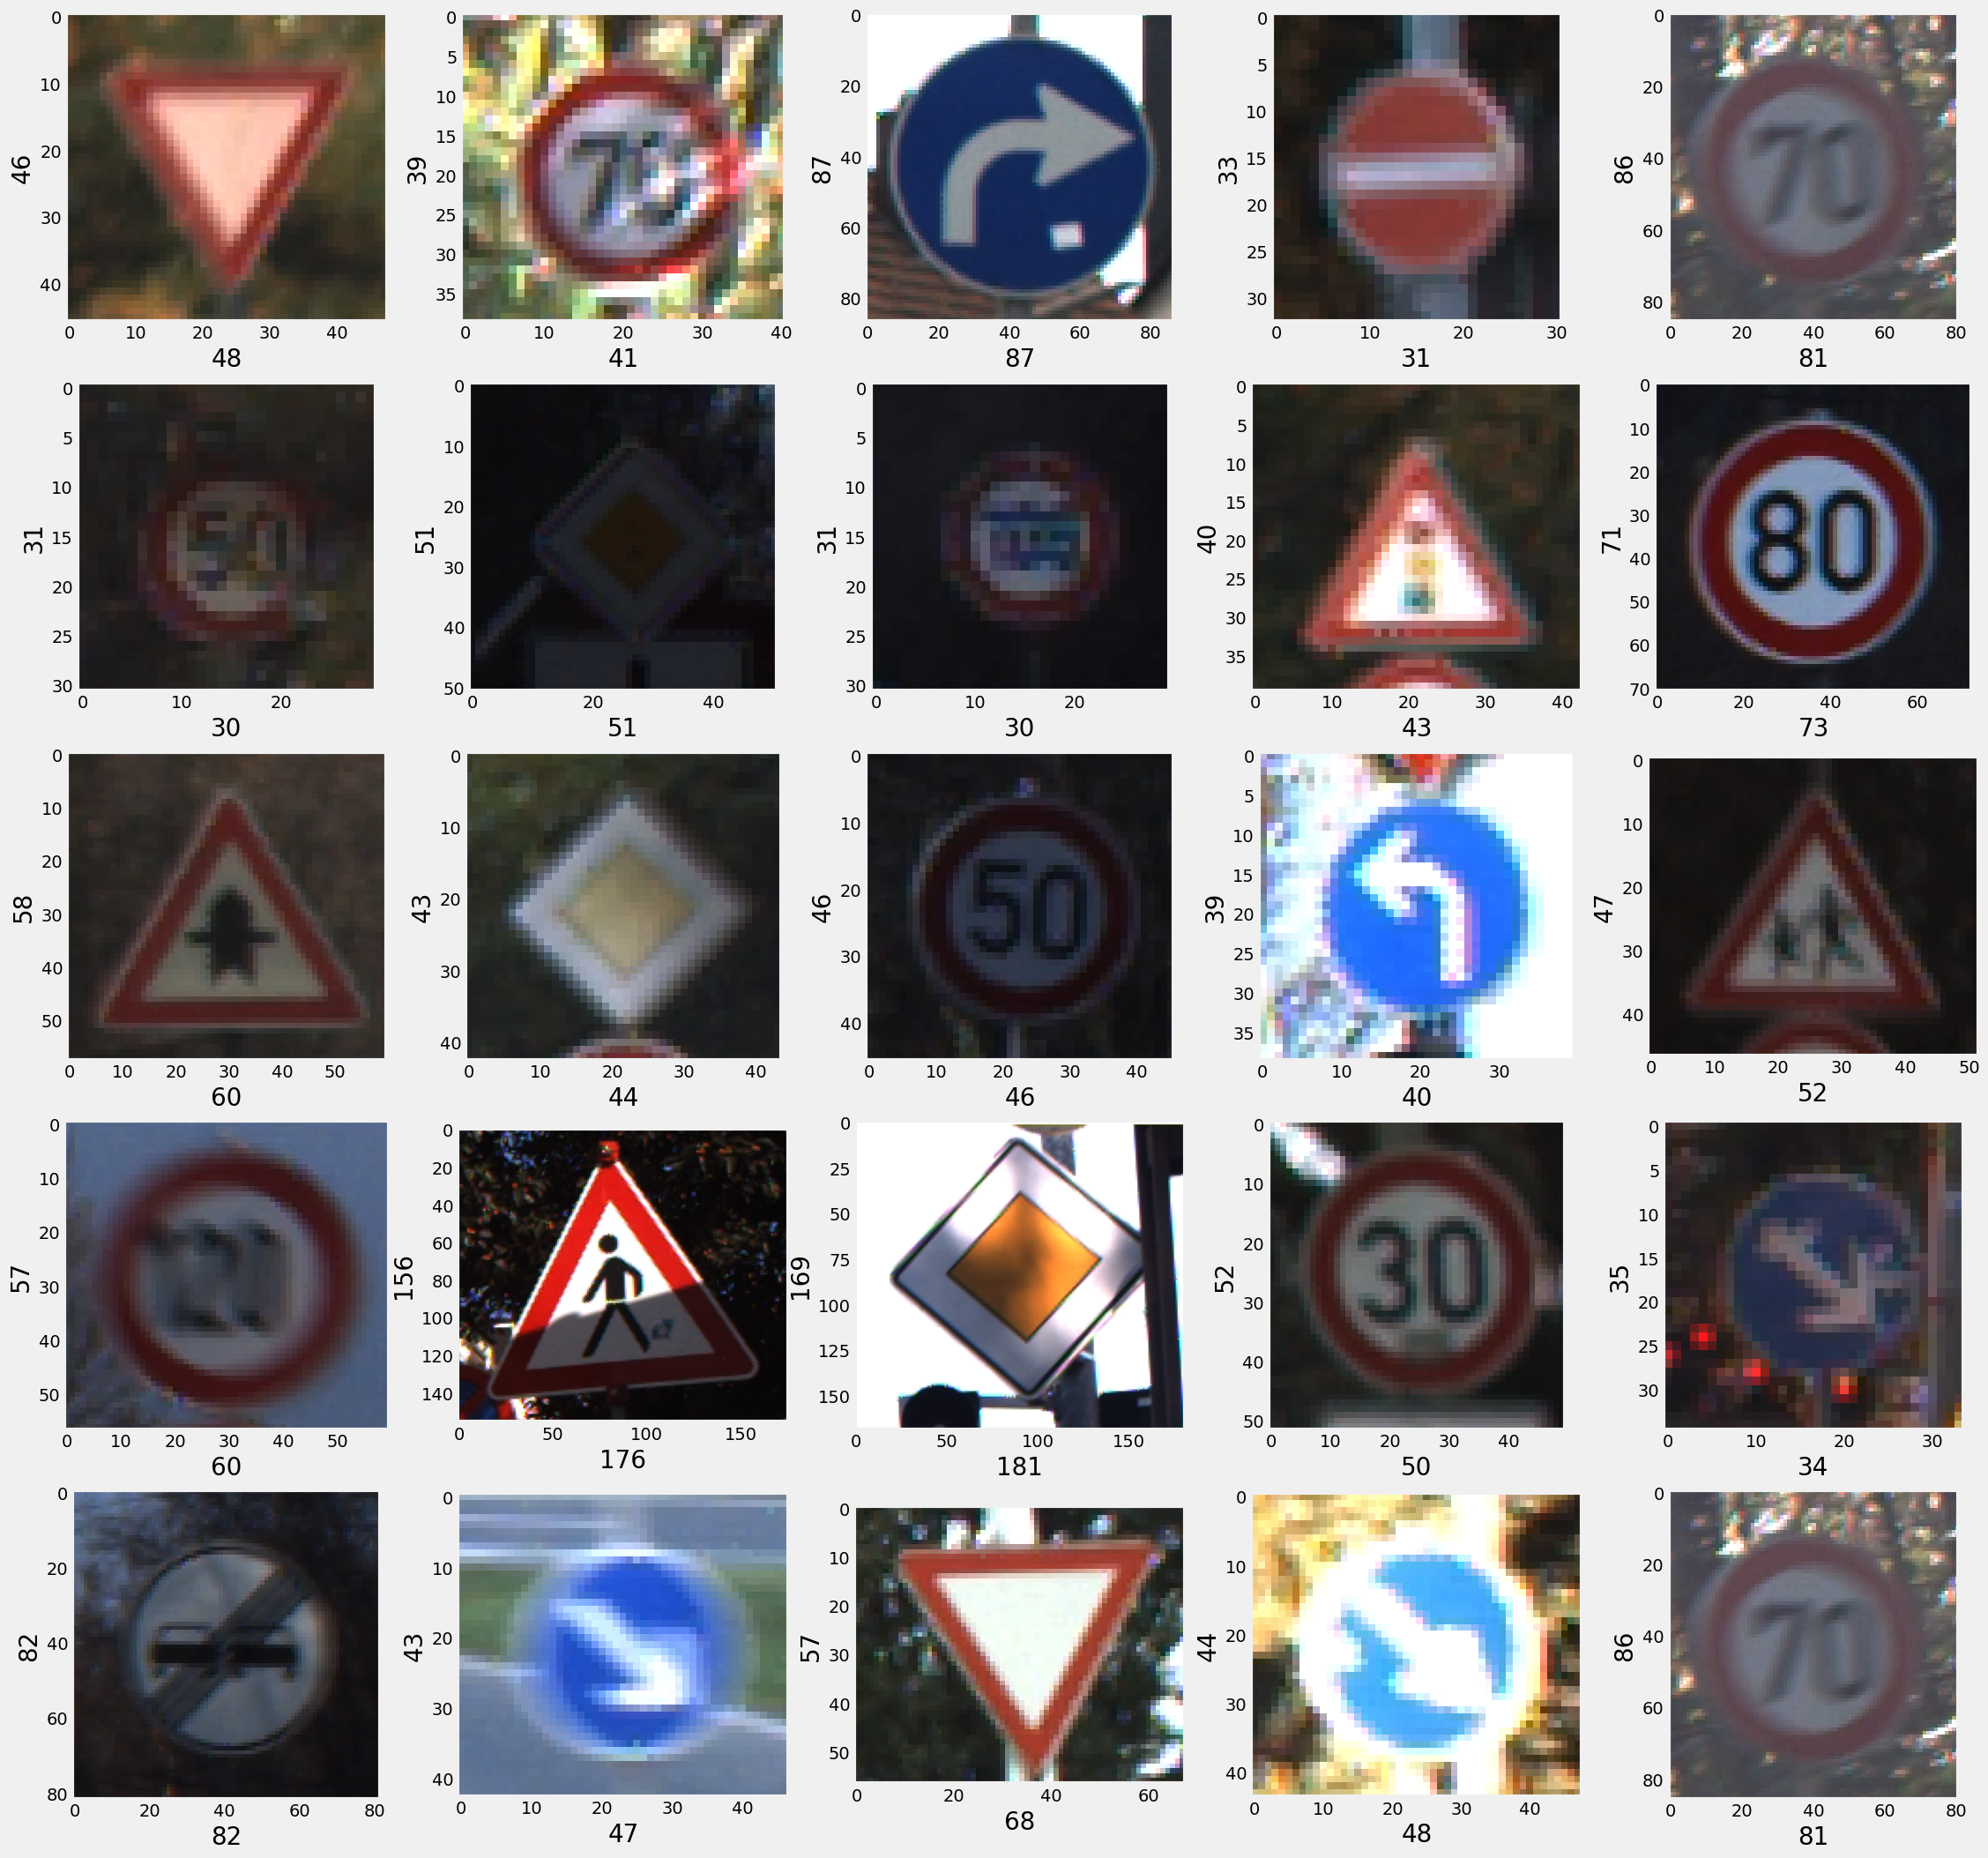

In [8]:
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=False)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

## Collecting the Training Data

In [9]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


## Shuffling the training data

In [10]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

## Splitting the data into train and validation set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=0, shuffle=True)

X_train = X_train/255
X_test = X_test/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_test.shape)

X_train.shape (31367, 30, 30, 3)
X_valid.shape (7842, 30, 30, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


## One hot encoding the labels

In [21]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_test = keras.utils.to_categorical(y_test, NUM_CATEGORIES)

print(y_train.shape)
print(y_test.shape)

(31367, 43)
(7842, 43)


## Making the model

In [23]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    
    # We have 43 classes that's why we have defined 43 in the dense
    keras.layers.Dense(43, activation='softmax')
])

In [24]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data Augmentation

In [25]:
aug = ImageDataGenerator(rotation_range=10, zoom_range=0.15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, horizontal_flip=False, vertical_flip=False, fill_mode="nearest")

## Training the model

In [26]:
history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 82s 81ms/step - loss: 2.1627 - accuracy: 0.3746 - val_loss: 0.5643 - val_accuracy: 0.8383
Epoch 2/20
981/981 [==============================] - 79s 81ms/step - loss: 0.7959 - accuracy: 0.7516 - val_loss: 0.1454 - val_accuracy: 0.9679
Epoch 3/20
981/981 [==============================] - 78s 79ms/step - loss: 0.4559 - accuracy: 0.8582 - val_loss: 0.0948 - val_accuracy: 0.9754
Epoch 4/20
981/981 [==============================] - 79s 81ms/step - loss: 0.3349 - accuracy: 0.8981 - val_loss: 0.0397 - val_accuracy: 0.9901
Epoch 5/20
981/981 [==============================] - 81s 83ms/step - loss: 0.2690 - accuracy: 0.9201 - val_loss: 0.0409 - val_accuracy: 0.9887
Epoch 6/20
981/981 [==============================] - 80s 81ms/step - loss: 0.2252 - accuracy: 0.9305 - val_loss: 0.0315 - val_accuracy: 0.9912
Epoch 7/20
981/981 [==============================] - 80s 81ms/step - loss: 0.1942 - accuracy: 0.9405 - val_loss: 0.0208 - val_accuracy:

## Save the model 

In [27]:
model.save("my_model.h5")

In [28]:
model.save_weights("output_weights")

## Evaluating the model

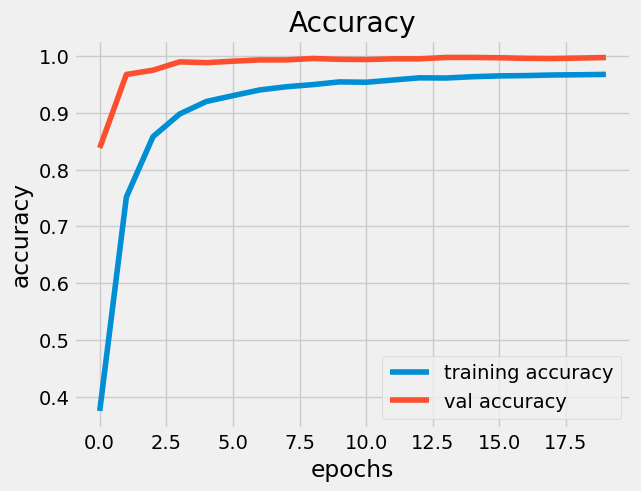

In [30]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

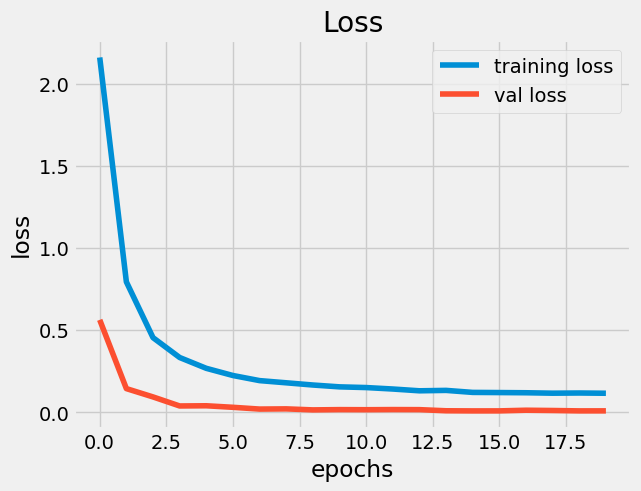

In [31]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Loading the test data and running the predictions

In [32]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=-1)
#Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred)*100)

395/395 [==============================] - 7s 17ms/step
Test Data accuracy:  97.53760886777513


## Visualizing the confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

<AxesSubplot:>

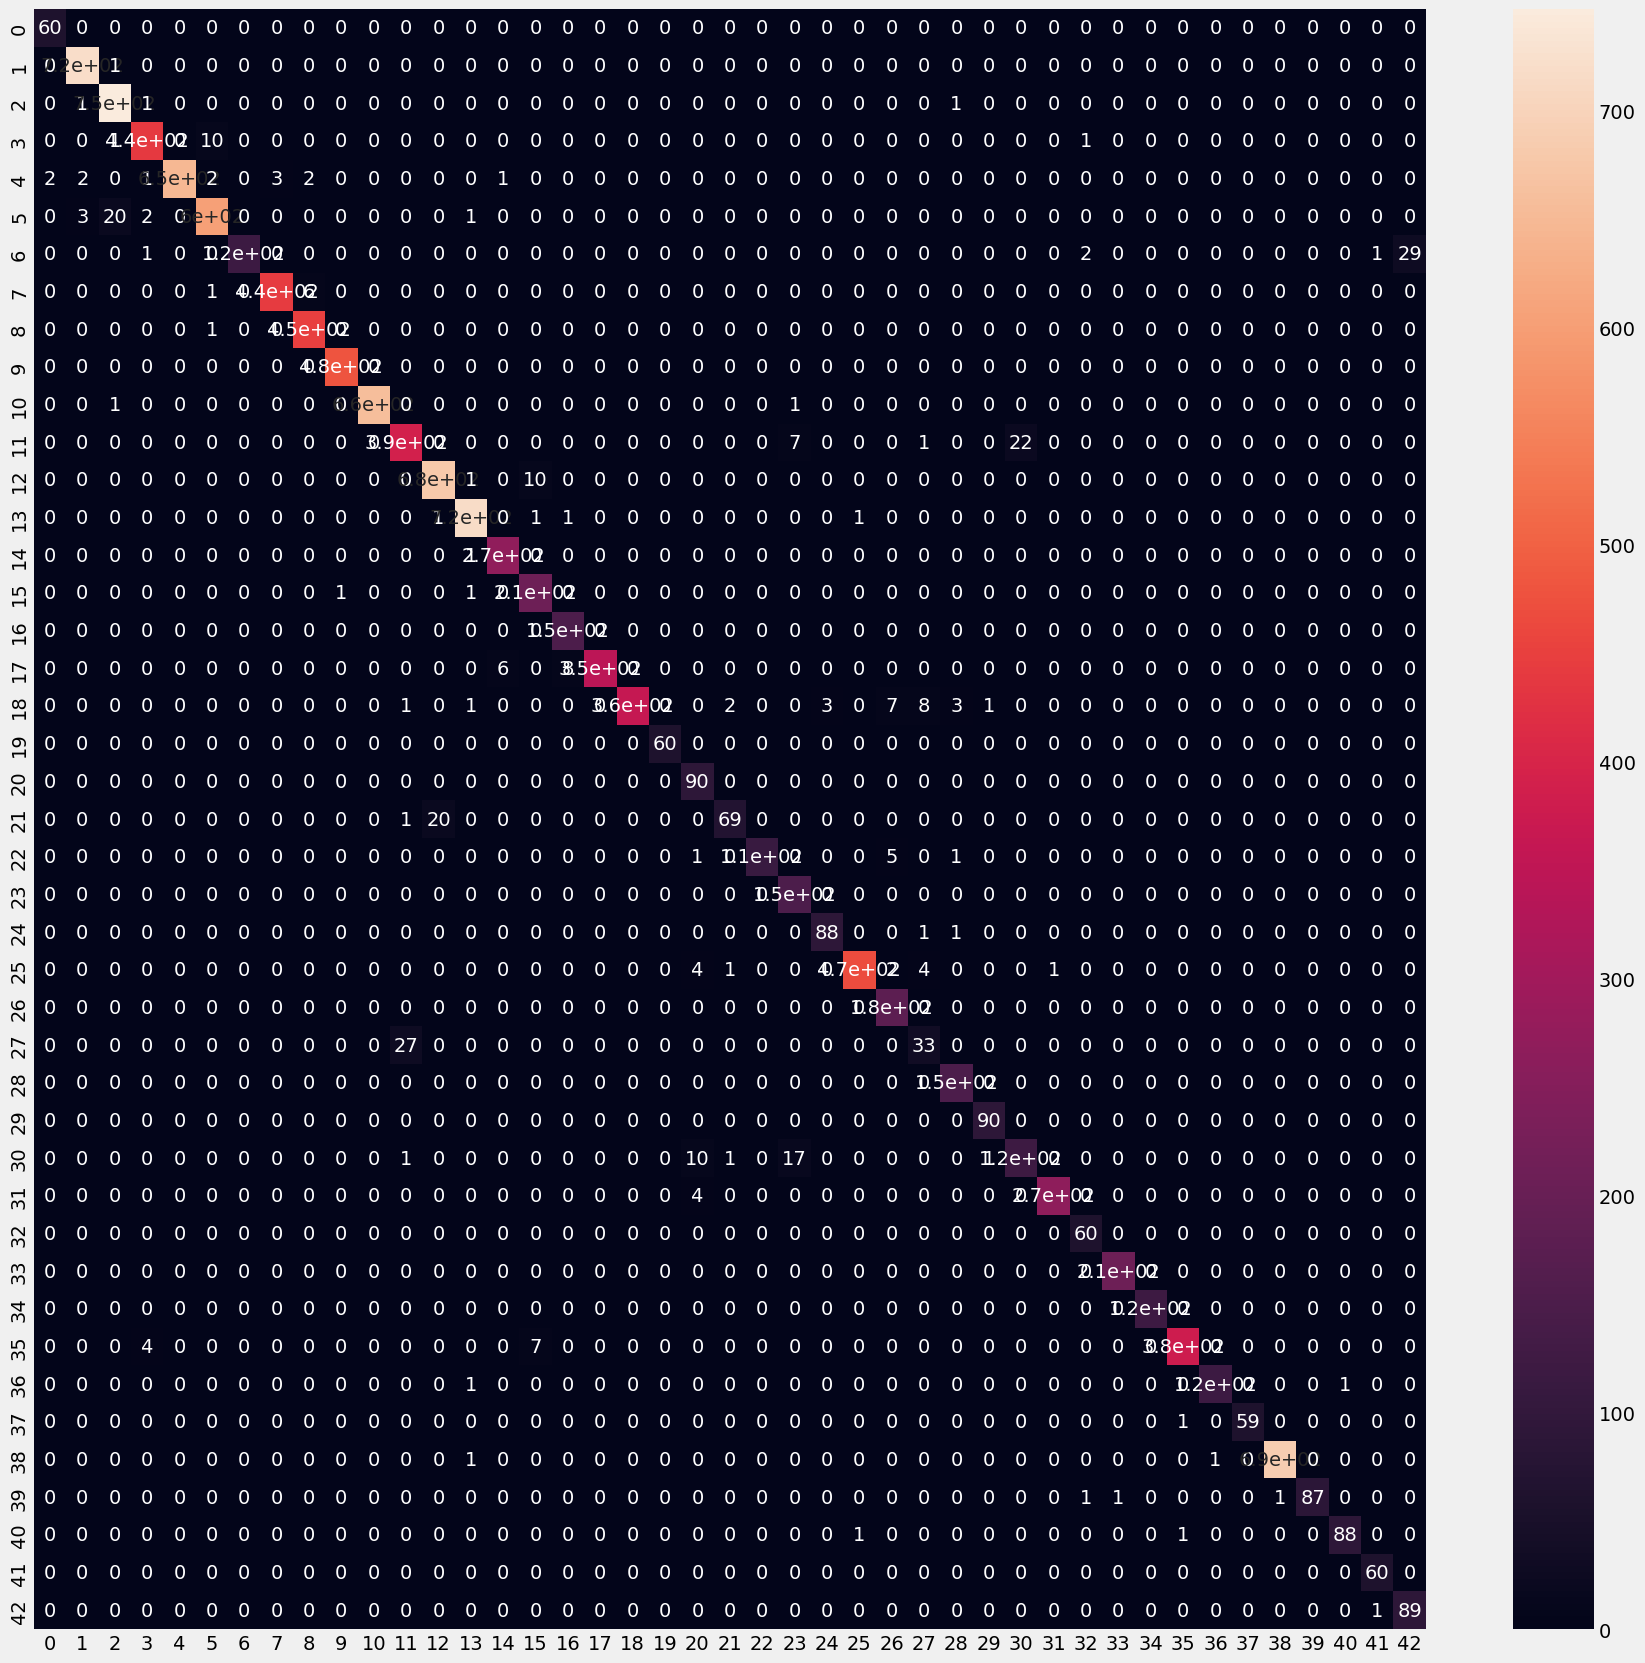

In [34]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

## Classification report

In [35]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.99      1.00      1.00       720
           2       0.97      1.00      0.98       750
           3       0.98      0.97      0.98       450
           4       1.00      0.98      0.99       660
           5       0.98      0.96      0.97       630
           6       1.00      0.78      0.88       150
           7       0.99      0.98      0.99       450
           8       0.98      1.00      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.93      0.93      0.93       420
          12       0.97      0.98      0.98       690
          13       0.99      0.99      0.99       720
          14       0.97      1.00      0.99       270
          15       0.92      0.99      0.95       210
          16       0.94      1.00      0.97       150
          17       1.00    

## Predictions on Test Data

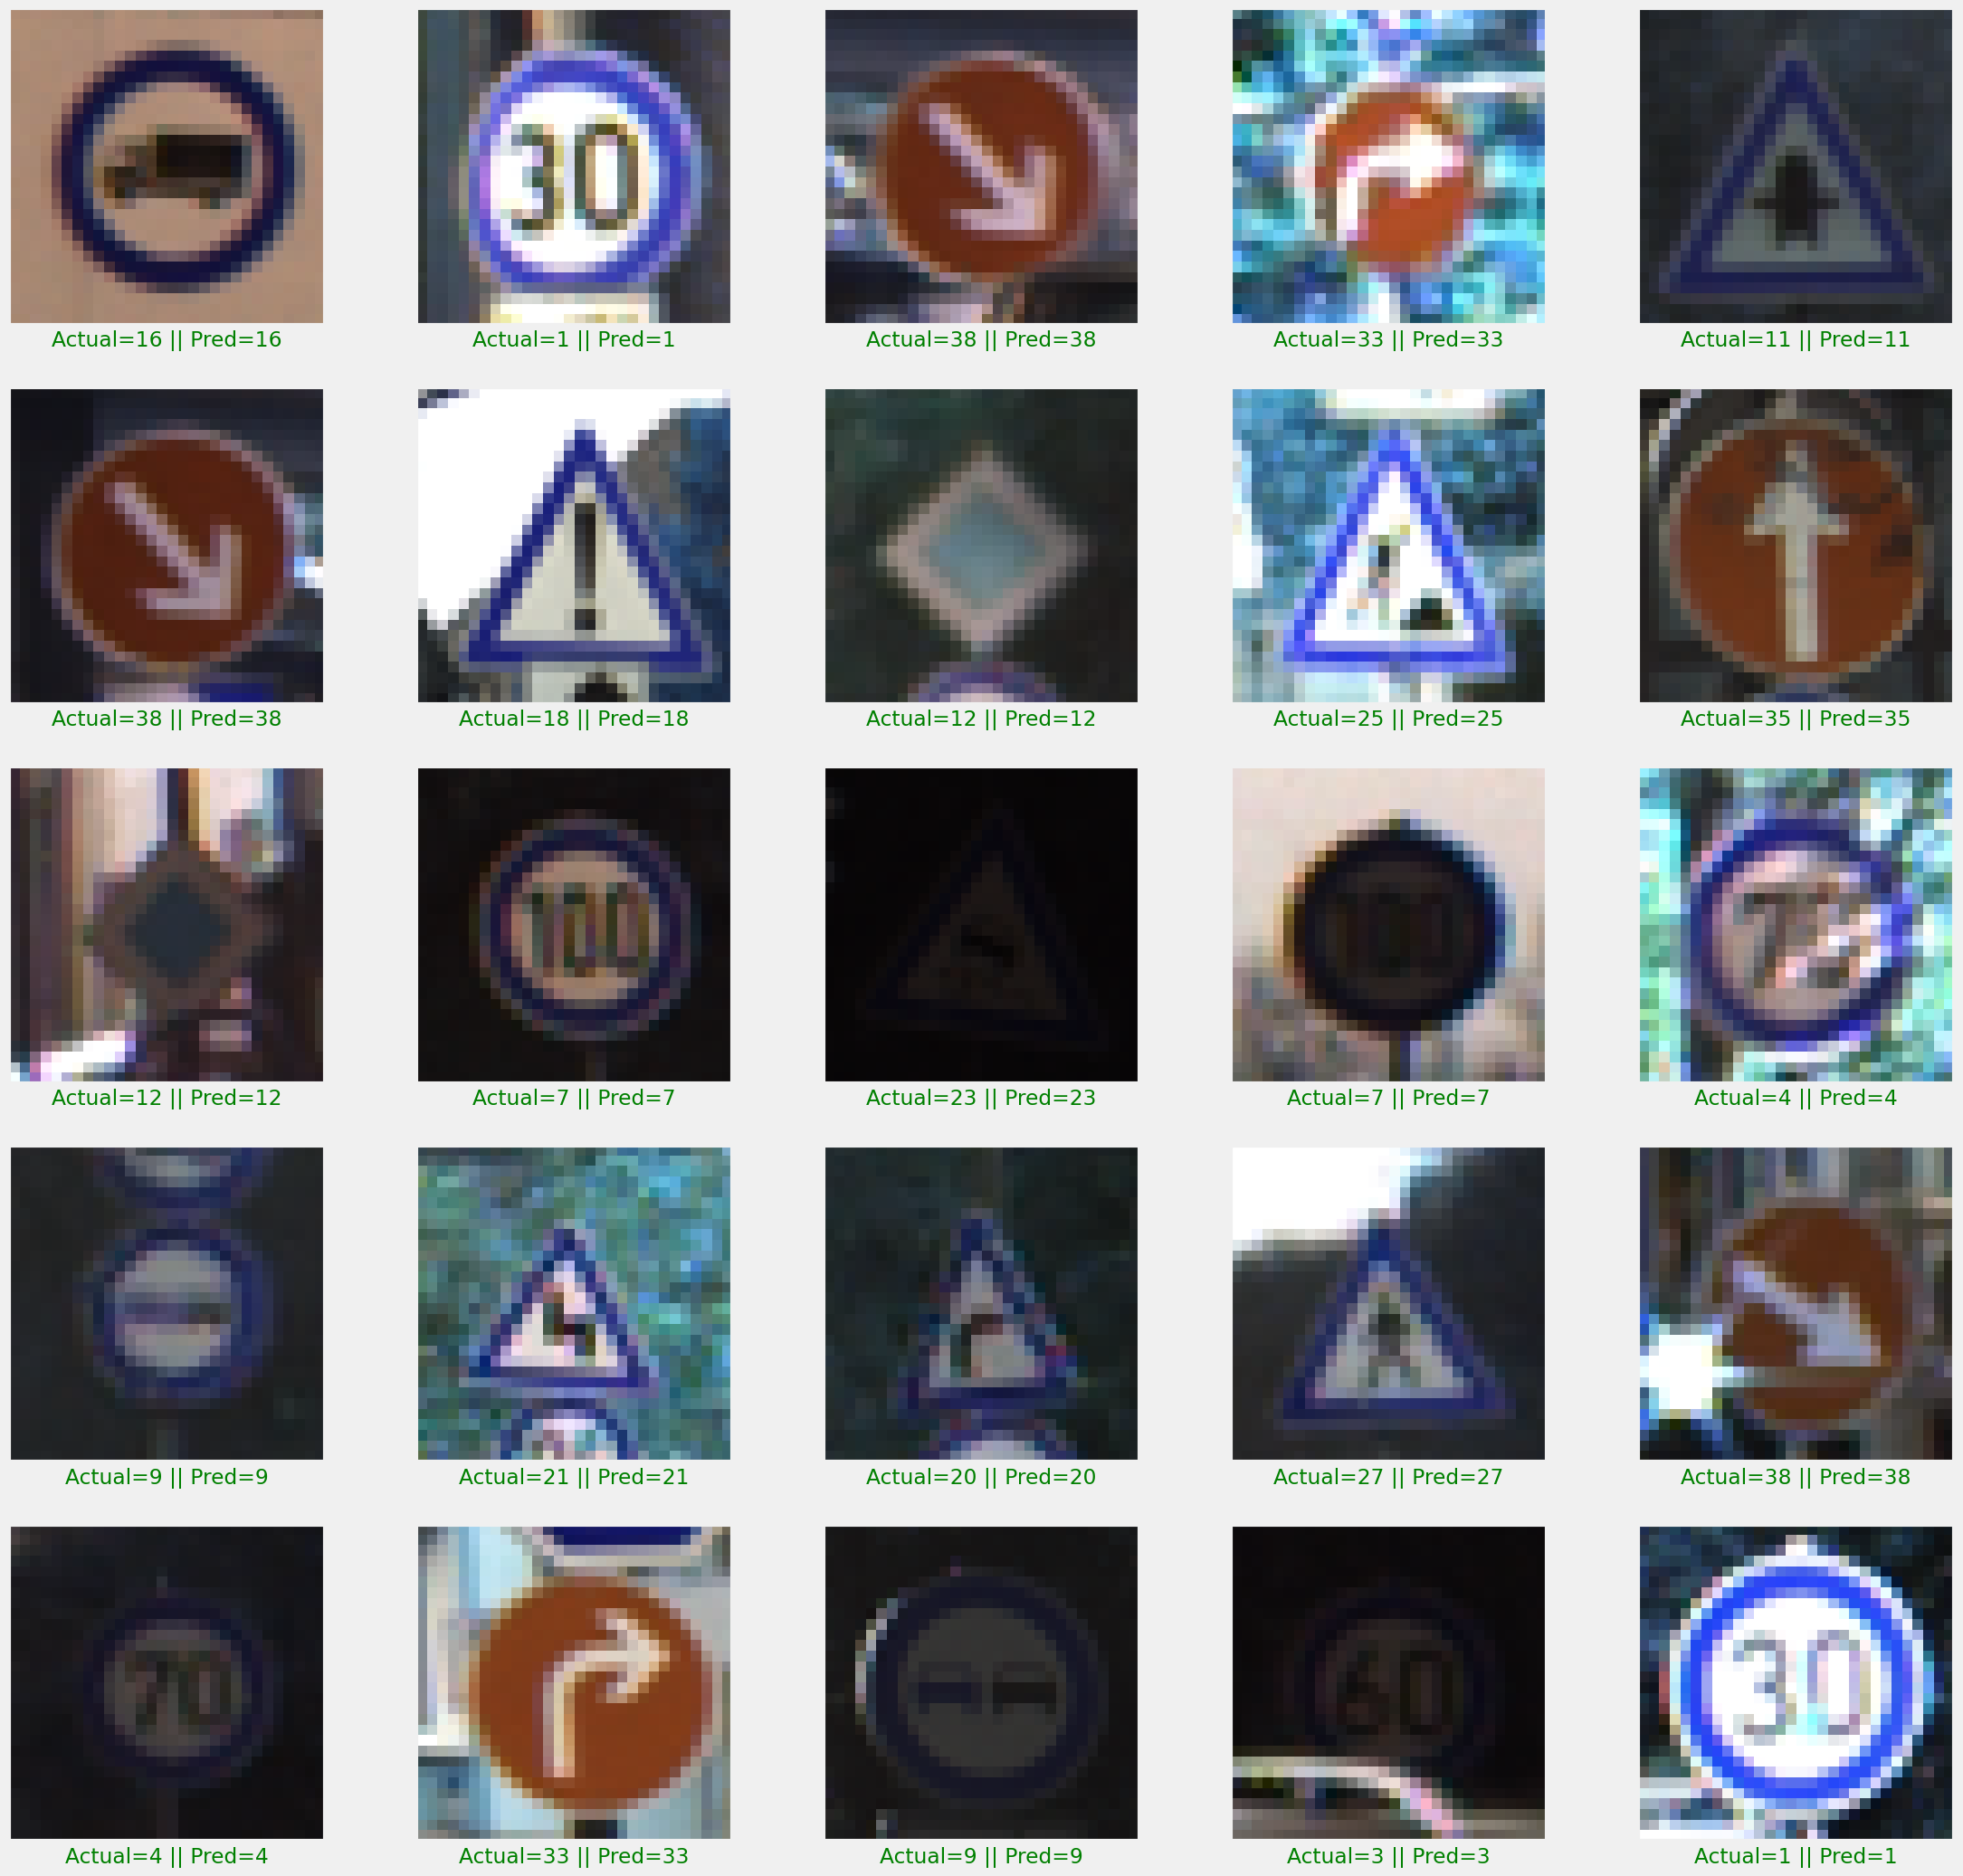

In [36]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

## Use Saved Model to predict Image

In [37]:
from keras.models import load_model
loaded_model = tf.keras.models.load_model("my_model.h5")

In [38]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)

    Y_pred = np.argmax(loaded_model.predict(X_test), axis=1)
    
    return image, Y_pred

1/1 [==============================] - 0s 11ms/step
Predicted traffic sign is:  Speed limit (30km/h)


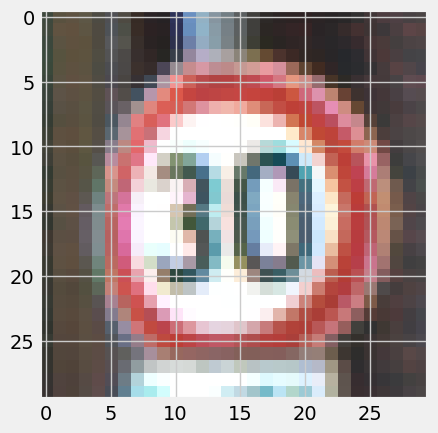

In [41]:
plot, prediction = test_on_img('Test/00001.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()